In [1]:
import pandas as pd

## Import Data

In [2]:
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

## Transforming Data

### Checking for Duplicates

Number of unique customers

In [4]:
len(df["customerID"].unique())

7043

Number of rows

In [5]:
df.shape[0]

7043

### Changes Values to Numeric

Note: This could be done with `sklearn.preprocessing.LabelEncoder` too

In [6]:
translation_dict = {}
rest_of_col = set(df.columns) - set(["customerID", "TotalCharges", "tenure", "MonthlyCharges"])
for col in rest_of_col:
    translation_dict[col] = dict([(val, key) for key, val in enumerate(df[col].unique())])
    df[col].replace(translation_dict[col], inplace=True)

In [7]:
translation_dict

{'DeviceProtection': {'No': 0, 'Yes': 1, 'No internet service': 2},
 'OnlineSecurity': {'No': 0, 'Yes': 1, 'No internet service': 2},
 'StreamingTV': {'No': 0, 'Yes': 1, 'No internet service': 2},
 'OnlineBackup': {'Yes': 0, 'No': 1, 'No internet service': 2},
 'Dependents': {'No': 0, 'Yes': 1},
 'Churn': {'No': 0, 'Yes': 1},
 'MultipleLines': {'No phone service': 0, 'No': 1, 'Yes': 2},
 'Partner': {'Yes': 0, 'No': 1},
 'InternetService': {'DSL': 0, 'Fiber optic': 1, 'No': 2},
 'PhoneService': {'No': 0, 'Yes': 1},
 'TechSupport': {'No': 0, 'Yes': 1, 'No internet service': 2},
 'PaperlessBilling': {'Yes': 0, 'No': 1},
 'SeniorCitizen': {0: 0, 1: 1},
 'StreamingMovies': {'No': 0, 'Yes': 1, 'No internet service': 2},
 'gender': {'Female': 0, 'Male': 1},
 'PaymentMethod': {'Electronic check': 0,
  'Mailed check': 1,
  'Bank transfer (automatic)': 2,
  'Credit card (automatic)': 3},
 'Contract': {'Month-to-month': 0, 'One year': 1, 'Two year': 2}}

In [8]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,29.85,29.85,0
1,5575-GNVDE,1,0,1,0,34,1,1,0,1,...,1,0,0,0,1,1,1,56.95,1889.5,0
2,3668-QPYBK,1,0,1,0,2,1,1,0,1,...,0,0,0,0,0,0,1,53.85,108.15,1
3,7795-CFOCW,1,0,1,0,45,0,0,0,1,...,1,1,0,0,1,1,2,42.30,1840.75,0
4,9237-HQITU,0,0,1,0,2,1,1,1,0,...,0,0,0,0,0,0,0,70.70,151.65,1


In [9]:
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors='coerce')

In [10]:
df.dropna(inplace=True)

## Modelling

In [46]:
from sklearn.linear_model import LogisticRegression, ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

### Split X and Y

In [12]:
X = df.loc[:, [col for col in df.columns if col not in ['customerID', 'Churn']]]

In [13]:
Y = df[["Churn"]]

In [14]:
X.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,29.85,29.85
1,1,0,1,0,34,1,1,0,1,1,1,0,0,0,1,1,1,56.95,1889.50
2,1,0,1,0,2,1,1,0,1,0,0,0,0,0,0,0,1,53.85,108.15
3,1,0,1,0,45,0,0,0,1,1,1,1,0,0,1,1,2,42.30,1840.75
4,0,0,1,0,2,1,1,1,0,1,0,0,0,0,0,0,0,70.70,151.65


In [15]:
Y.head()

,Churn
0,0
1,0
2,1
3,0
4,1


### Split into Train and Test

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

### Baseline

In [17]:
clf = LogisticRegression(random_state=42).fit(X_train, y_train)

/home/joeyism/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/joeyism/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [18]:
y_predict = clf.predict(X_test)

In [19]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1033
           1       0.61      0.50      0.55       374

    accuracy                           0.78      1407
   macro avg       0.72      0.69      0.71      1407
weighted avg       0.77      0.78      0.78      1407



## Model Improvement Experiments

### Oversampling

In [20]:
%matplotlib inline

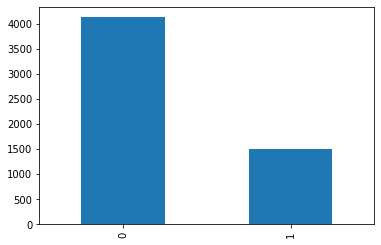

In [21]:
y_train["Churn"].value_counts().plot(kind='bar')

There's an imbalance in data, in that there are fewer 1s to train and coincidentally, 1s don't test as well, so let's oversample it

In [22]:
indices = y_train.loc[y_train["Churn"] == 1, :].index

In [23]:
X_train_oversampled = pd.concat([X_train, X_train.loc[indices]])
y_train_oversampled = pd.concat([y_train, y_train.loc[indices]])

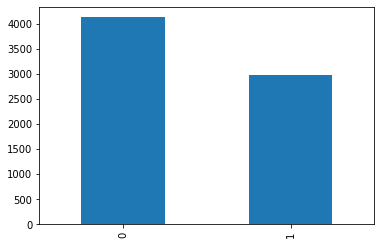

In [24]:
y_train_oversampled["Churn"].value_counts().plot(kind='bar')

In [25]:
clf = LogisticRegression(random_state=42).fit(X_train_oversampled, y_train_oversampled)
y_predict = clf.predict(X_test)
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.89      0.77      0.83      1033
           1       0.54      0.74      0.62       374

    accuracy                           0.76      1407
   macro avg       0.72      0.75      0.73      1407
weighted avg       0.80      0.76      0.77      1407



/home/joeyism/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/joeyism/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


While f1 for `1` is doing better, it makes `0` do worse and the imbalance may not be worth it

## One Hot Encode

In [26]:
X_onehot = X.copy()
reverse_translation_dict = {}
for col in translation_dict:
    if col == "Churn":
        continue
        
    reverse_translation_dict[col] = dict([(val, key) for key, val in translation_dict[col].items()])
    X_onehot[col].replace(reverse_translation_dict[col], inplace=True)

reverse_translation_dict

{'DeviceProtection': {0: 'No', 1: 'Yes', 2: 'No internet service'},
 'OnlineSecurity': {0: 'No', 1: 'Yes', 2: 'No internet service'},
 'StreamingTV': {0: 'No', 1: 'Yes', 2: 'No internet service'},
 'OnlineBackup': {0: 'Yes', 1: 'No', 2: 'No internet service'},
 'Dependents': {0: 'No', 1: 'Yes'},
 'MultipleLines': {0: 'No phone service', 1: 'No', 2: 'Yes'},
 'Partner': {0: 'Yes', 1: 'No'},
 'InternetService': {0: 'DSL', 1: 'Fiber optic', 2: 'No'},
 'PhoneService': {0: 'No', 1: 'Yes'},
 'TechSupport': {0: 'No', 1: 'Yes', 2: 'No internet service'},
 'PaperlessBilling': {0: 'Yes', 1: 'No'},
 'SeniorCitizen': {0: 0, 1: 1},
 'StreamingMovies': {0: 'No', 1: 'Yes', 2: 'No internet service'},
 'gender': {0: 'Female', 1: 'Male'},
 'PaymentMethod': {0: 'Electronic check',
  1: 'Mailed check',
  2: 'Bank transfer (automatic)',
  3: 'Credit card (automatic)'},
 'Contract': {0: 'Month-to-month', 1: 'One year', 2: 'Two year'}}

In [27]:
X_onehot.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65


In [28]:
X_onehot = pd.get_dummies(X_onehot)

In [29]:
X_onehot_train, X_onehot_test, y_onehot_train, y_onehot_test = train_test_split(X_onehot, Y, test_size=0.2, random_state=42)
clf = LogisticRegression(random_state=42).fit(X_onehot_train, y_onehot_train)
y_predict = clf.predict(X_onehot_test)
print(classification_report(y_onehot_test, y_predict))

              precision    recall  f1-score   support

           0       0.83      0.88      0.86      1033
           1       0.62      0.51      0.56       374

    accuracy                           0.79      1407
   macro avg       0.73      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407



/home/joeyism/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/joeyism/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


This improves the score a little bit, but not a lot

## Using Specific Columns

In [54]:
X_train.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
6030,0,0,1,0,43,0,0,0,0,1,1,0,1,1,0,0,2,49.05,2076.20
3410,1,0,1,0,3,1,1,0,0,1,0,0,1,0,0,1,3,53.40,188.70
5483,0,0,0,0,55,1,2,1,0,1,1,0,0,0,0,0,0,77.75,4458.15
5524,1,0,0,1,45,1,1,0,1,1,0,1,0,0,2,1,2,54.65,2553.70
6337,0,0,0,1,55,1,2,1,1,1,0,0,1,1,1,1,1,100.90,5448.60


In [60]:
relevant_cols = [col for col in X_train.columns if col not in ["OnlineSecurity", "OnlineBackup", "DeviceProtection", "Contract", "PaymentMethod", "Monthlycharges"]]
clf = LogisticRegression(random_state=42).fit(X_train[relevant_cols], y_train)
y_predict = clf.predict(X_test[relevant_cols])
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1033
           1       0.64      0.48      0.55       374

    accuracy                           0.79      1407
   macro avg       0.74      0.69      0.71      1407
weighted avg       0.78      0.79      0.78      1407



/home/joeyism/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/joeyism/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## Summary

As can be seen, different things changes precision and recall for `Churn = No` and `Churn = Yes`. Depending on what business wants, modifications can be done to target specifically those metrics